# Analysing Attacker 

This notebook contains the code required to conduct a Bayesian data analysis on a list of name, age tuples.

## First attacker

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [age]
Sampling 2 chains: 100%|██████████| 3000/3000 [00:02<00:00, 1087.97draws/s]
/home/apreda/workspace/master/thesis/pymc3/project/pymc3/venv/lib/python3.6/site-packages/arviz/data/io_pymc3.py:56: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  chain_likelihoods.append(np.stack(log_like))
/home/apreda/workspace/master/thesis/pymc3/project/pymc3/venv/lib/python3.6/site-packages/arviz/data/io_pymc3.py:56: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  chain_likelihoods.append(np.stack(log_like))


calculated_average10.0


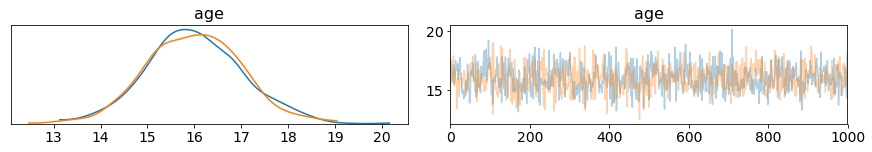

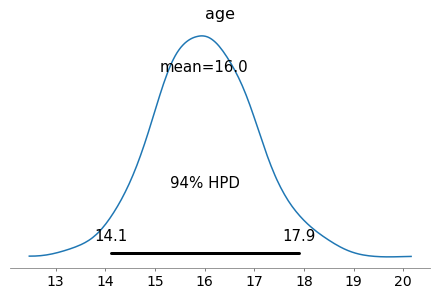

In [10]:
%matplotlib inline
import pymc3 as pm
import arviz as az
from functools import reduce
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

def alpha(nameAgeList):
    ageMap = map(lambda args: (args[1], 1), nameAgeList)
    addedAgeTuple = reduce(lambda x, y: (x[0] + y[0], x[1] + y[1]),
                           ageMap)  # In Python 2, the map() built-in function returns an iterator https://thepythonguru.com/python-builtin-functions/map/
    # In Python 2, the map()  function returns a list instead of an iterator (which is not very efficient in terms of memory consumption), so we don’t need to wrap map()  in a list()  call.
    averageAge = addedAgeTuple[0] / addedAgeTuple[1]
    return averageAge

# the attacker knows that Tom is in the list

example_list = [5,2,5,6,1,2,6,7,2,6,3,5,5]

# x = stats.mean(example_list)
# print(x)
# 
# y = stats.median(example_list)
# print(y)
# 
# z = stats.mode(example_list)
# print(z)
# 
# a = stats.stdev(example_list)
# print(a)
# 
# b = stats.variance(example_list)
# print(b)

# with pm.Model() as tutorial:
#     np.random.seed(123)
#     trials = 4
#     theta_real = 0.35 # unknown value in a real experiment
#     data = stats.bernoulli.rvs(p=theta_real, size=trials)
#     θ = pm.Beta('θ', alpha=1., beta=1.)
#     y = pm.Bernoulli('y', p=θ, observed=data)
#     trace = pm.sample(1000, random_seed=123)
#     az.plot_trace(trace)
#     az.plot_posterior(trace)
# 
# np.random.seed(1)
# az.plot_posterior({'θ':stats.beta.rvs(5, 11, size=1000)})
# plt.savefig('first attacker plot.png', dpi=300)

with pm.Model() as attackerModelConstantList:
    # Priors for age model parameters
    name_Age = [("Tom", 10)]#what the attacker has learned and Tom's age in the prior
    #an array of 100 random vaiables with random names and ages and for one of them I want to observe
    # age = pm.Normal('age', mu=alpha(nameAgeList), sd=20)
    random_age = np.random.uniform(16,16)
    np.ones
    age = pm.Normal("age", mu = np.mean(random_age), sd=1)
    # the attacker knows that Tom is in the list
    for each in name_Age:
        if "Tom"in each:
            found_Tom=pm.Bernoulli("found_Tom",1.0, observed=True)
            #pm.Deterministic variable if TOm is in the list and observed it
            #remove the variable altogether; compute deterministically of the array of ages and make an observation of the average age
            pass
        else:
            found_Tom = pm.Bernoulli("found_Tom", 0.0, observed=False)
    # Expected value of outcome
    calculated_average = alpha(name_Age)
    print("calculated_average" + str(calculated_average))
    expected_average = 16
    trace = pm.sample(1000, random_seed=123) 
    az.plot_trace(trace)
    az.plot_posterior(trace)
         # Likelihood (sampling distribution) of observations    
    plt.savefig('first attacker plot.png', dpi=300)